<a href="https://colab.research.google.com/github/Nilesh-Thamke17/Deep-Learning-Lab/blob/main/DLPR4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Epoch 1/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8669 - loss: 0.4638 - val_accuracy: 0.9657 - val_loss: 0.1265
Epoch 2/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9602 - loss: 0.1299 - val_accuracy: 0.9718 - val_loss: 0.1003
Epoch 3/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 12s 4ms/step - accuracy: 0.9750 - loss: 0.0837 - val_accuracy: 0.9755 - val_loss: 0.0832
Epoch 4/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9824 - loss: 0.0598 - val_accuracy: 0.9735 - val_loss: 0.0875
Epoch 5/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9878 - loss: 0.0427 - val_accuracy: 0.9722 - val_loss: 0.0892
Epoch 6/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9910 - loss: 0.0322 - val_accuracy: 0.9777 - val_loss: 0.0762
Epoch 7/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9923 - loss: 0.0274 - val_accuracy: 0.9780 - val_loss: 0.0784
Epoch 8/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9940 - loss: 0.021

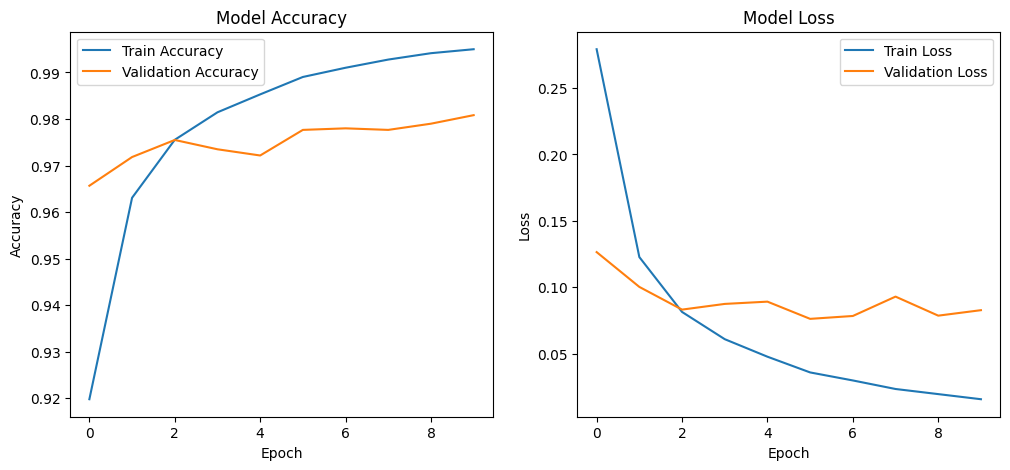

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


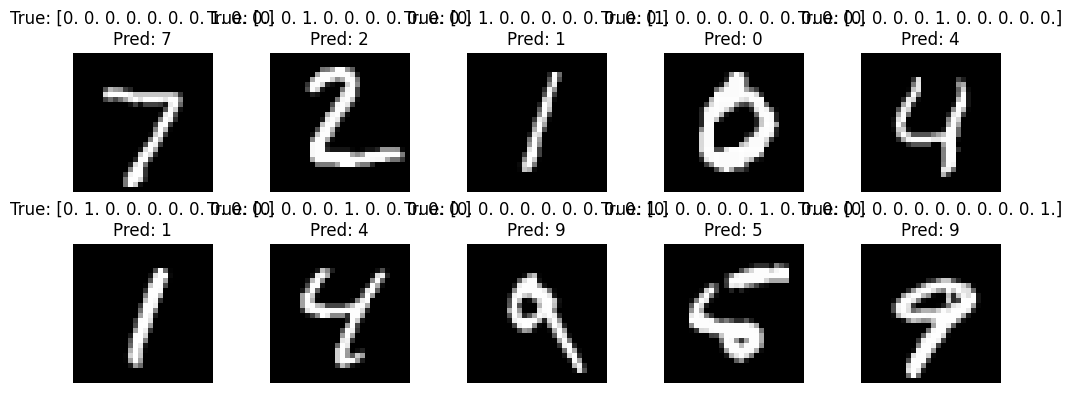

In [3]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()# Load the MNIST dataset externally (tensorflow downloads it)
x_train = x_train.astype('float32') / 255.0 # Normalize the images
x_test = x_test.astype('float32') / 255.0
y_train = to_categorical(y_train, 10)# One-hot encode the labels
y_test = to_categorical(y_test, 10)
model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
history = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=32,
                    validation_split=0.1)
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f'Test accuracy: {test_acc:.4f}')
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

import numpy as np

plt.figure(figsize=(10, 4))
# Get the model's predictions for the first 10 test images
predictions = model.predict(x_test[:10])
predicted_labels = np.argmax(predictions, axis=1)

for i in range(10):
    plt.subplot(2, 5, i + 1)
    # Reshape the flattened image back to 28x28 for displaying
    plt.imshow(x_test[i].reshape(28, 28), cmap="gray")
    plt.title(f"True: {y_test[i]}\nPred: {predicted_labels[i]}")
    plt.axis('off')
plt.tight_layout()
plt.show()